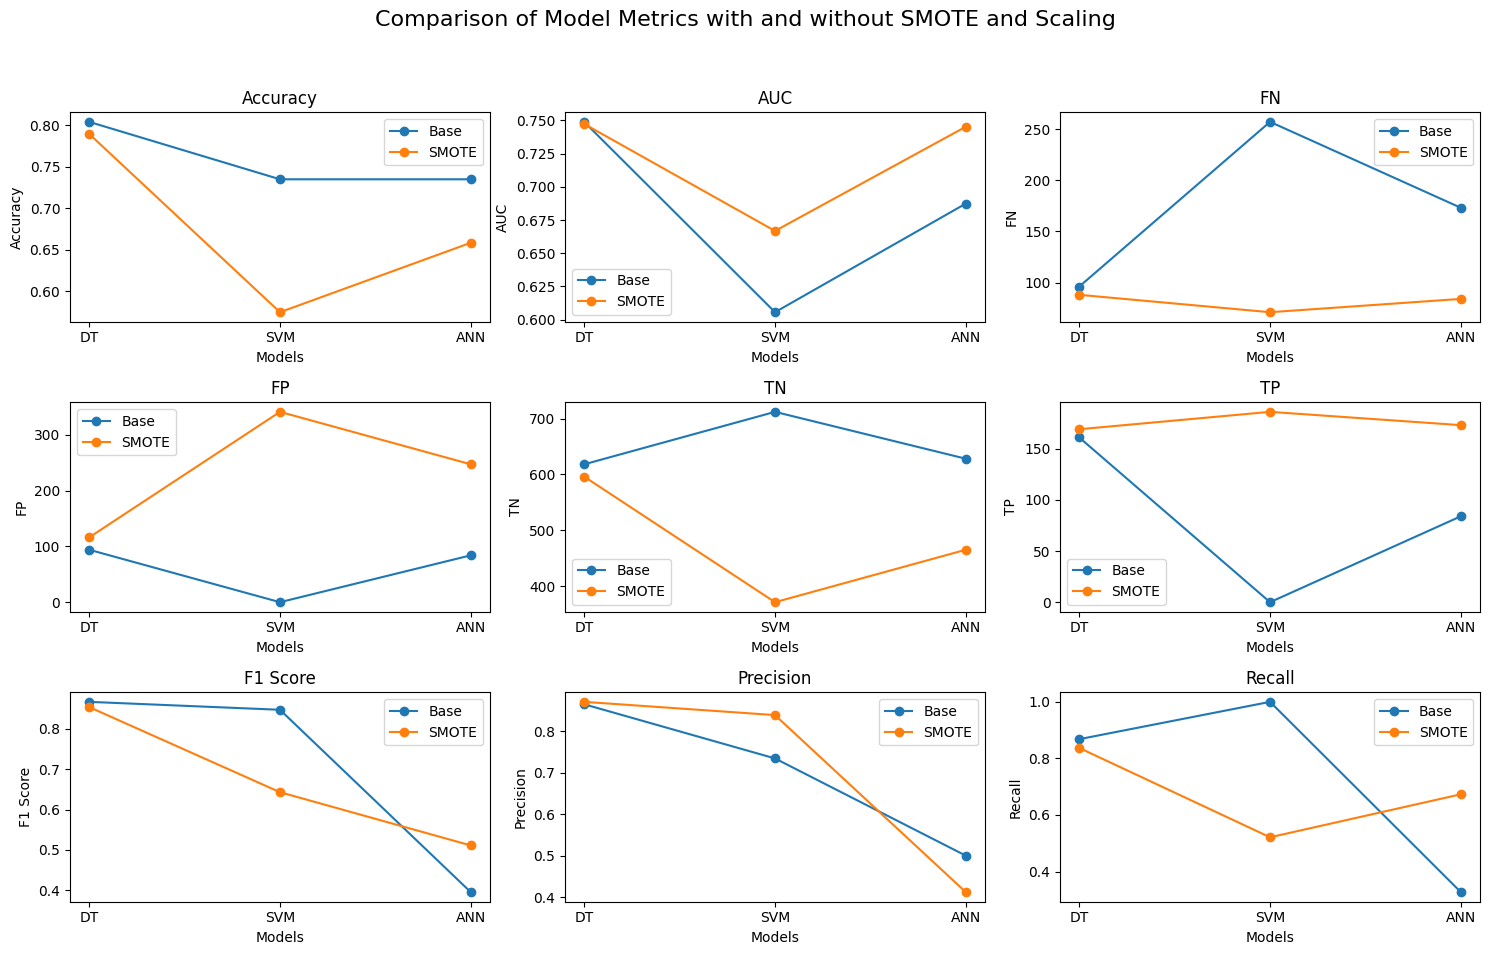

In [10]:
import matplotlib.pyplot as plt
import numpy as np

models = ['DT', 'SVM', 'ANN']
metrics = ['Accuracy', 'AUC', 'FN', 'FP', 'TN', 'TP', 'F1 Score', 'Precision', 'Recall']

metrics_values = np.array([
    [0.803922, 0.748907, 96, 94, 618, 161, 0.86676, 0.865546, 0.867978],  # DT Base
    [0.789474, 0.747333, 88, 116, 596, 169, 0.853868, 0.871345, 0.837079], # DT SMOTE
    [0.734778, 0.605605, 257, 0, 712, 0, 0.847115, 0.734778, 1],           # SVM Base
    [0.574819, 0.66678, 71, 341, 371, 186, 0.642981, 0.839367, 0.521067],   # SVM SMOTE
    [0.734778, 0.687399, 173, 84, 628, 84, 0.395294, 0.5, 0.326848],        # ANN Base
    [0.658411, 0.745273, 84, 247, 465, 173, 0.511078, 0.411905, 0.673152]   # ANN SMOTE
])

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Comparison of Model Metrics with and without SMOTE and Scaling', fontsize=16)

for row in range(3):
    for col in range(3):
        metric_index = row * 3 + col
        metric = metrics[metric_index]
        axes[row, col].plot(models, metrics_values[[0, 2, 4], metric_index], label='Base', marker='o')
        axes[row, col].plot(models, metrics_values[[1, 3, 5], metric_index], label='SMOTE', marker='o')
        axes[row, col].set_title(metric)
        axes[row, col].set_xlabel('Models')
        axes[row, col].set_ylabel(metric)
        axes[row, col].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

